### 입력값 2개, 출력값 2개
### y1 = w1 * X1 + w2 * X2 + bias, y2 = w1 * X1 + w2 * X2 + bias

In [1]:
# %autosave 0 

import numpy as np

import tensorflow as tf

# tensorflow 2.x에 내장된 Keras 사용
from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 파일 로딩
from tensorflow.keras.layers import Dense       # 전결합층
from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
rc('font', family='Malgun Gothic')

# print(tf.__version__)

In [2]:
# 데이터
# x_train = np.array([[1, 5], [2, 6], [3, 7], [4, 8], [5, 9], [6, 10], [7, 11], [8, 12], [9, 13], [10, 14]])
x_train = np.array([[i, i+4] for i in range(1, 11)])
print(x_train.shape)
print(x_train[0].shape) # 한행의 구조
print(x_train)

(10, 2)
(2,)
[[ 1  5]
 [ 2  6]
 [ 3  7]
 [ 4  8]
 [ 5  9]
 [ 6 10]
 [ 7 11]
 [ 8 12]
 [ 9 13]
 [10 14]]


In [3]:
# 1 * 2 = 2, 5 * 2 = 10
# y_train = np.array([[2, 10], [4, 12], [6, 14], [8, 16], [10, 18], [12, 20], [14, 22], [16, 24], [18, 26], [20, 28]])
y_train = []
for i in range(len(x_train)): # [ 1  5]...
    y_train.append([x_train[i][0]*2, x_train[i][1]*2])

y_train = np.array(y_train)
print(y_train.shape)
print(y_train)

(10, 2)
[[ 2 10]
 [ 4 12]
 [ 6 14]
 [ 8 16]
 [10 18]
 [12 20]
 [14 22]
 [16 24]
 [18 26]
 [20 28]]


### 정확도가 떨어지는 모델

In [28]:
del model # 객체 삭제
tf.random.set_seed(0)
model = Sequential()
model.add(Dense(10, input_dim=2, activation='linear')) 
model.add(Dense(2, activation='linear')) 
# model.compile(optimizer='adam', loss='mse')
model.compile(optimizer=Adam(lr=0.01), loss='mse')
model.summary()
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs=30, batch_size=1)
# (데이터 건수 / batch_size) * epochs -> 파라미터 변환 횟수

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 22        
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
8/8 [==============================] - 1s 51ms/step - loss: 94.5936 - val_loss: 75.0571
Epoch 2/30
8/8 [==============================] - 0s 39ms/step - loss: 17.3749 - val_loss: 13.0990
Epoch 3/30
8/8 [==============================] - 0s 35ms/step - loss: 2.5006 - val_loss: 8.8808
Epoch 4/30
8/8 [==============================] - 0s 26ms/step - loss: 5.0672 - val_loss: 5.0772
Epoch 5/30
8/8 [==============================] - 0s 31ms/step - loss: 2.5730 - val_loss: 3.8495
Epoch 6/30
8/8 [==============

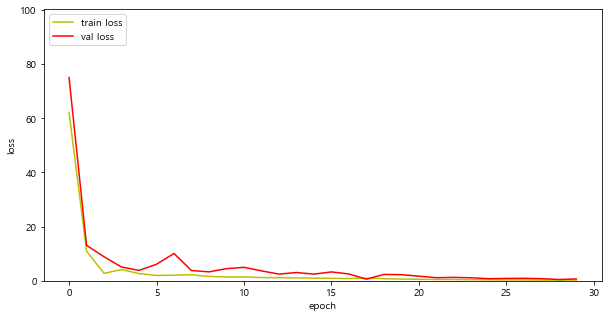

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0,100.3603]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.

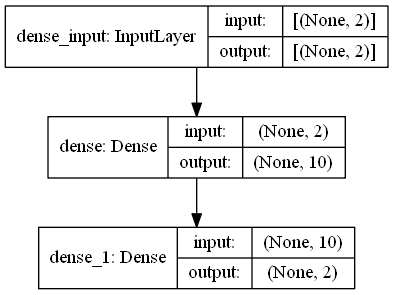

In [6]:
plot_model(model, to_file='./Basic4.png', show_shapes=True, show_layer_names=True)

In [7]:
# 모델 사용
x = np.array([[11, 19], [12, 20], [13, 21], [14, 22], [15, 23]])

p = model.predict(x) # 모델 사용
print(p.shape)
print(p)

(5, 2)
[[23.267616 35.90351 ]
 [25.266493 37.903618]
 [27.265368 39.903732]
 [29.264242 41.903835]
 [31.26312  43.903946]]


In [8]:
y = np.array([[22, 38], [24, 40], [26, 42], [28, 44], [30, 46]]) # 타겟
for i in range(len(x)):
    fmt = 'x: {0}, 실제값: {1}, 예측값: {2:.5f} {3:.5f}, 정제된값: {4:.0f} {5:.0f}'
    print(fmt.format(x[i], y[i], p[i][0], p[i][1], p[i][0], p[i][1]))

x: [11 19], 실제값: [22 38], 예측값: 23.26762 35.90351, 정제된값: 23 36
x: [12 20], 실제값: [24 40], 예측값: 25.26649 37.90362, 정제된값: 25 38
x: [13 21], 실제값: [26 42], 예측값: 27.26537 39.90373, 정제된값: 27 40
x: [14 22], 실제값: [28 44], 예측값: 29.26424 41.90384, 정제된값: 29 42
x: [15 23], 실제값: [30 46], 예측값: 31.26312 43.90395, 정제된값: 31 44


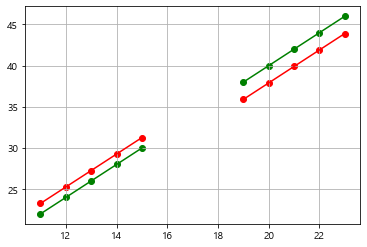

In [9]:
# x: 11 --> y: 22, x: 12 --> y: 24
plt.scatter(x, y, color='g')  # 실제값
plt.plot(x, y, color='g')
plt.scatter(x, p, color='r')  # 예측값
plt.plot(x, p, color='r')
plt.grid(True)
plt.show()

In [10]:
# 학습률만 가지고는 정확도 향상에 한계가 있음.
# 해결책
# 훈련/검증 데이터의 증가
# 네트워크의 크기를 변경
# 학습률을 미세하게 조절

### 네트워크의 크기를 변경

In [30]:
# del model # 객체 삭제
tf.random.set_seed(0)
model = Sequential()
model.add(Dense(60, input_dim=2, activation='linear')) 
model.add(Dense(80, activation='linear')) 
model.add(Dense(20, activation='linear')) 
model.add(Dense(2, activation='linear')) 
# model.compile(optimizer='adam', loss='mse')
model.compile(optimizer=Adam(lr=0.01), loss='mse')
model.summary()
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs=100, batch_size=1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 60)                180       
_________________________________________________________________
dense_16 (Dense)             (None, 80)                4880      
_________________________________________________________________
dense_17 (Dense)             (None, 20)                1620      
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 42        
Total params: 6,722
Trainable params: 6,722
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 1s 36ms/step - loss: 104.3935 - val_loss: 151.6605
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 48.0146 - val_loss: 75.7321
Epoch 3/100
8/8 [==============================] 

Epoch 73/100
8/8 [==============================] - 0s 11ms/step - loss: 1.6712e-05 - val_loss: 5.3946e-05
Epoch 74/100
8/8 [==============================] - 0s 9ms/step - loss: 1.9850e-05 - val_loss: 1.5756e-04
Epoch 75/100
8/8 [==============================] - 0s 10ms/step - loss: 5.3772e-05 - val_loss: 5.3420e-06
Epoch 76/100
8/8 [==============================] - 0s 11ms/step - loss: 1.4329e-05 - val_loss: 1.1292e-05
Epoch 77/100
8/8 [==============================] - 0s 10ms/step - loss: 2.6221e-06 - val_loss: 1.6070e-06
Epoch 78/100
8/8 [==============================] - 0s 9ms/step - loss: 3.3492e-06 - val_loss: 3.1632e-06
Epoch 79/100
8/8 [==============================] - 0s 11ms/step - loss: 4.7672e-06 - val_loss: 5.3088e-05
Epoch 80/100
8/8 [==============================] - 0s 9ms/step - loss: 2.9129e-05 - val_loss: 1.4762e-04
Epoch 81/100
8/8 [==============================] - 0s 10ms/step - loss: 7.8446e-06 - val_loss: 1.6036e-04
Epoch 82/100
8/8 [======================

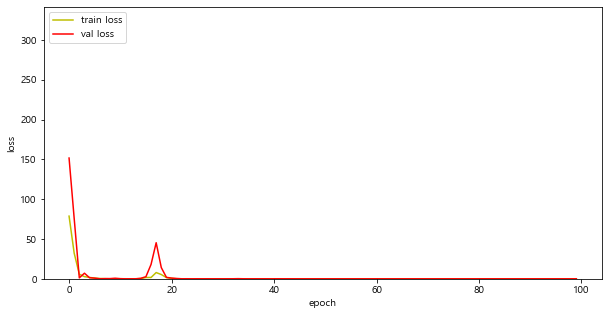

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 341.3603]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.

x: [11 19], 실제값: [22 38], 예측값: 22.28627 38.07635, 정제된값: 22 38
x: [12 20], 실제값: [24 40], 예측값: 24.28793 40.07825, 정제된값: 24 40
x: [13 21], 실제값: [26 42], 예측값: 26.28959 42.08015, 정제된값: 26 42
x: [14 22], 실제값: [28 44], 예측값: 28.29125 44.08204, 정제된값: 28 44
x: [15 23], 실제값: [30 46], 예측값: 30.29291 46.08393, 정제된값: 30 46


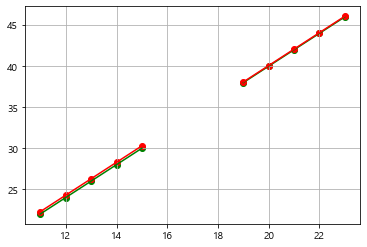

In [32]:
# 모델 사용, 16, 17, 18을 제외함
x = np.array([[11, 19], [12, 20], [13, 21], [14, 22], [15, 23]])
p = model.predict(x) # 모델 사용
y = np.array([[22, 38], [24, 40], [26, 42], [28, 44], [30, 46]]) # 타겟
for i in range(len(x)):
    fmt = 'x: {0}, 실제값: {1}, 예측값: {2:.5f} {3:.5f}, 정제된값: {4:.0f} {5:.0f}'
    print(fmt.format(x[i], y[i], p[i][0], p[i][1], p[i][0], p[i][1]))
    
plt.scatter(x, y, color='g')  # 실제값
plt.plot(x, y, color='g')
plt.scatter(x, p, color='r')  # 예측값
plt.plot(x, p, color='r')
plt.grid(True)
plt.show()    

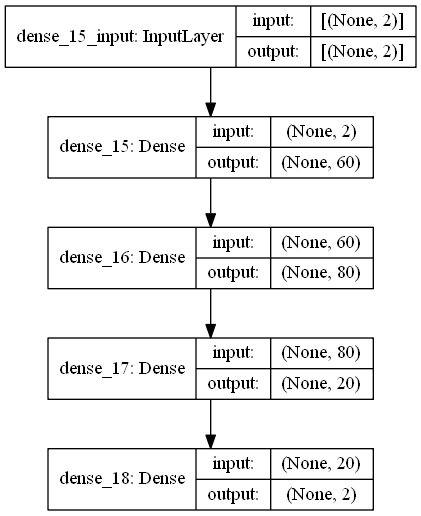

In [33]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [34]:
model.save('./Basic4.h5')

In [35]:
!dir/w

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: DC48-5F8B

 C:\kd1\ws_python\notebook\machine\dnn\lm 디렉터리

[.]                  [..]                 [.ipynb_checkpoints]
Basic1.ipynb         Basic1.png           Basic2.ipynb
Basic3.ipynb         Basic3.png           Basic4.h5
Basic4.ipynb         Basic4.png           Basic4_use.ipynb
model.png            
              10개 파일             659,523 바이트
               3개 디렉터리  18,993,811,456 바이트 남음
